## GI Behavior Health

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = '/content/drive/My Drive/GI_Behavior_Health/Data/Patient_Counts_with_Lauren_5 22_copy.xlsx'
df = pd.read_excel(file_path, sheet_name = 'Sheet1')
# 2. Replace any stray hyphens or other known bad tokens with NaT
df.loc[df['Appointment Date'] == '-', 'Appointment Date'] = pd.NaT

# 3. Convert to datetime, coercing anything else that still fails into NaT
df['Appointment Date'] = pd.to_datetime(df['Appointment Date'], errors='coerce')

# 4. Drop the time portion by taking only .date
df['Appointment Date'] = df['Appointment Date'].dt.normalize()

# 5. (Optional) If you want to remove rows where the date could not be parsed:
df = df[df['Appointment Date'].notna()].reset_index(drop=True)

# Verify
print(df['Appointment Date'].dtype)   # should now be “object” (Python date) or datetime.date
df.head()
#code_distn


datetime64[ns]


,Provider,Provider Type,Appointment Date,Appointment Scheduled Date,Patient ID,MRN,Appointment Type,Location,Department,Appointment Status,...,Division (Reporting),Division (Department Cost Center),Division (Provider Cost Center),Section (Department Cost Center),Section (Provider Cost Center),Cost Center (Department),Cost Center (Provider),Appointment Department Region,Cancel N Days,Direct Scheduled Flag
0,"SALWEN-DEREMER, JESSICA K",Psychologist,2025-07-02,2025-04-24 10:24:47,Z3826713,66042980-4,PLACEHOLDER NO COMMUNICATION,N MHMH,DHMC GASTRO 4L,Scheduled,...,AMC Lebanon,AMC Lebanon,AMC Lebanon,AMC LEB GASTROENTEROLOGY & HEPATOLOGY,AMC LEB EMBEDDED PSYCH SERVICES,GASTROENTEROLOGY HEPATOLOGY (14100),EMBEDDED PSYCH SERVICES (17107),DHMC,-,0
1,"HACKER, KATRINA S",Psychologist,2023-05-02,2023-04-07 08:41:44,Z2266952,50355619-3,MYD-H SH1 VIDEO VISIT,N MHMH,DHMC GASTRO 4L,Canceled,...,AMC Lebanon,AMC Lebanon,AMC Lebanon,AMC LEB GASTROENTEROLOGY & HEPATOLOGY,AMC LEB EMBEDDED PSYCH SERVICES,GASTROENTEROLOGY HEPATOLOGY (14100),EMBEDDED PSYCH SERVICES (17107),DHMC,4,0
2,"HACKER, KATRINA S",Psychologist,2023-05-09,2023-04-07 08:41:44,Z2266952,50355619-3,MYD-H SH2 VIDEO VISIT,N MHMH,DHMC GASTRO 4L,Canceled,...,AMC Lebanon,AMC Lebanon,AMC Lebanon,AMC LEB GASTROENTEROLOGY & HEPATOLOGY,AMC LEB EMBEDDED PSYCH SERVICES,GASTROENTEROLOGY HEPATOLOGY (14100),EMBEDDED PSYCH SERVICES (17107),DHMC,11,0
3,"HACKER, KATRINA S",Psychologist,2023-05-16,2023-04-07 08:41:44,Z2266952,50355619-3,MYD-H SH2 VIDEO VISIT,N MHMH,DHMC GASTRO 4L,Canceled,...,AMC Lebanon,AMC Lebanon,AMC Lebanon,AMC LEB GASTROENTEROLOGY & HEPATOLOGY,AMC LEB EMBEDDED PSYCH SERVICES,GASTROENTEROLOGY HEPATOLOGY (14100),EMBEDDED PSYCH SERVICES (17107),DHMC,18,0
4,"HACKER, KATRINA S",Psychologist,2023-05-23,2023-04-07 08:41:44,Z2266952,50355619-3,MYD-H SH2 VIDEO VISIT,N MHMH,DHMC GASTRO 4L,Canceled,...,AMC Lebanon,AMC Lebanon,AMC Lebanon,AMC LEB GASTROENTEROLOGY & HEPATOLOGY,AMC LEB EMBEDDED PSYCH SERVICES,GASTROENTEROLOGY HEPATOLOGY (14100),EMBEDDED PSYCH SERVICES (17107),DHMC,25,0


In [ ]:
allow_status = ['Canceled', 'Completed', 'No Show']
filled_df = df[df['Appointment Status'].isin(allow_status)]
print("The number of unique appo types in filled_df is: ",len(filled_df['Appointment Status'].unique()))
filled_df.head()

The number of unique appo types in filled_df is:  3


,Provider,Provider Type,Appointment Date,Appointment Scheduled Date,Patient ID,MRN,Appointment Type,Location,Department,Appointment Status,...,Division (Reporting),Division (Department Cost Center),Division (Provider Cost Center),Section (Department Cost Center),Section (Provider Cost Center),Cost Center (Department),Cost Center (Provider),Appointment Department Region,Cancel N Days,Direct Scheduled Flag
1,"HACKER, KATRINA S",Psychologist,2023-05-02,2023-04-07 08:41:44,Z2266952,50355619-3,MYD-H SH1 VIDEO VISIT,N MHMH,DHMC GASTRO 4L,Canceled,...,AMC Lebanon,AMC Lebanon,AMC Lebanon,AMC LEB GASTROENTEROLOGY & HEPATOLOGY,AMC LEB EMBEDDED PSYCH SERVICES,GASTROENTEROLOGY HEPATOLOGY (14100),EMBEDDED PSYCH SERVICES (17107),DHMC,4,0
2,"HACKER, KATRINA S",Psychologist,2023-05-09,2023-04-07 08:41:44,Z2266952,50355619-3,MYD-H SH2 VIDEO VISIT,N MHMH,DHMC GASTRO 4L,Canceled,...,AMC Lebanon,AMC Lebanon,AMC Lebanon,AMC LEB GASTROENTEROLOGY & HEPATOLOGY,AMC LEB EMBEDDED PSYCH SERVICES,GASTROENTEROLOGY HEPATOLOGY (14100),EMBEDDED PSYCH SERVICES (17107),DHMC,11,0
3,"HACKER, KATRINA S",Psychologist,2023-05-16,2023-04-07 08:41:44,Z2266952,50355619-3,MYD-H SH2 VIDEO VISIT,N MHMH,DHMC GASTRO 4L,Canceled,...,AMC Lebanon,AMC Lebanon,AMC Lebanon,AMC LEB GASTROENTEROLOGY & HEPATOLOGY,AMC LEB EMBEDDED PSYCH SERVICES,GASTROENTEROLOGY HEPATOLOGY (14100),EMBEDDED PSYCH SERVICES (17107),DHMC,18,0
4,"HACKER, KATRINA S",Psychologist,2023-05-23,2023-04-07 08:41:44,Z2266952,50355619-3,MYD-H SH2 VIDEO VISIT,N MHMH,DHMC GASTRO 4L,Canceled,...,AMC Lebanon,AMC Lebanon,AMC Lebanon,AMC LEB GASTROENTEROLOGY & HEPATOLOGY,AMC LEB EMBEDDED PSYCH SERVICES,GASTROENTEROLOGY HEPATOLOGY (14100),EMBEDDED PSYCH SERVICES (17107),DHMC,25,0
5,"HACKER, KATRINA S",Psychologist,2023-06-06,2023-04-07 08:42:58,Z2266952,50355619-3,MYD-H SH2 VIDEO VISIT,N MHMH,DHMC GASTRO 4L,Canceled,...,AMC Lebanon,AMC Lebanon,AMC Lebanon,AMC LEB GASTROENTEROLOGY & HEPATOLOGY,AMC LEB EMBEDDED PSYCH SERVICES,GASTROENTEROLOGY HEPATOLOGY (14100),EMBEDDED PSYCH SERVICES (17107),DHMC,39,0


In [ ]:
set(df['Appointment Type'])

{'BILLING ONLY',
 'FOLLOW UP VISIT',
 'MYD-H GROUP VIDEO VISIT',
 'MYD-H SH1 VIDEO VISIT',
 'MYD-H SH2 VIDEO VISIT',
 'MYD-H VIDEO VISIT FOLLOW UP',
 'MYD-H VIDEO VISIT NEW',
 'MYD-H VIDEO VISIT NO CHARGE',
 'MYD-H VIDEO VISIT NOW',
 'MYD-H VIDEO VISIT SCF',
 'NEW PATIENT',
 'PLACEHOLDER NO COMMUNICATION',
 'PLACEHOLDER VIEW ONLY',
 'PSY EVALUATION',
 'PSY FOLLOW UP',
 'SPECIAL CLINIC NEW',
 'TELEPHONE OFFICE VISIT'}

In [ ]:
# --------------------
# For individual and group appointments, show the number of complete, cancleled, and no show appointments for each year
# --------------------

import pandas as pd

# 1) Make sure your dates are datetimes, and pull out the year
df['Year'] = df['Appointment Date'].dt.year

# 2) Define which raw types count as “group”
group_types = {
    'MYD-H SH1 VIDEO VISIT',
    'MYD-H SH2 VIDEO VISIT',
    'MYD-H GROUP VIDEO VISIT'
}

df['Appointment Category'] = df['Appointment Type'].apply(
    lambda t: 'group appointments' if t in group_types else 'individual appointments'
)
df = df[df['Year'].isin([2022,2023,2024])]

# 3) Crosstab / pivot to get counts
summary = pd.crosstab(
    index=[df['Year'], df['Appointment Category']],
    columns=df['Appointment Status'],
    dropna=False
).reset_index()

print(summary)


Appointment Status  Year     Appointment Category  Arrived  Canceled  \
0                   2022       group appointments        0       687   
1                   2022  individual appointments        0       115   
2                   2023       group appointments        5       658   
3                   2023  individual appointments        0       243   
4                   2024       group appointments        4       829   
5                   2024  individual appointments        0       538   

Appointment Status  Completed  Left without seen  No Show  Scheduled  
0                         506                  0      214          0  
1                         216                  2       14          0  
2                         795                  0      190          0  
3                         524                  3       49         54  
4                         642                  0      186          0  
5                         871                  3       71        109 

In [ ]:
# --------------------
# For individual and group visits, calculate the total appointments and visits over 3 years (2022,2023,2024).
# --------------------

import pandas as pd
df = summary
#df = pd.DataFrame(data)import pandas as pd

# Create the DataFrame from the provided data
data = {
    "Year": [2022, 2022, 2023, 2023, 2024, 2024],
    "Appointment Category": [
        "group appointments",
        "individual appointments",
        "group appointments",
        "individual appointments",
        "group appointments",
        "individual appointments",
    ],
    "Arrived": [0, 0, 5, 0, 4, 0],
    "Canceled": [687, 115, 658, 243, 829, 538],
    "Completed": [506, 216, 795, 524, 642, 871],
    "Left without seen": [0, 2, 0, 3, 0, 3],
    "No Show": [214, 14, 190, 49, 186, 71],
    "Scheduled": [0, 0, 0, 54, 0, 109],
}

df = pd.DataFrame(data)

# Compute total appointments (sum across the relevant columns) for each category over all years
df["Total Appointments"] = df[["Arrived", "Canceled", "Completed", "Left without seen", "No Show", "Scheduled"]].sum(axis=1)

total_by_category = df.groupby("Appointment Category")[
    ["Arrived", "Canceled", "Completed", "Left without seen", "No Show", "Scheduled", "Total Appointments"]
].sum()

# Completed visits totals for each category
completed_by_category = df.groupby("Appointment Category")["Completed"].sum()

total_by_category, completed_by_category



(                         Arrived  Canceled  Completed  Left without seen  \
 Appointment Category                                                       
 group appointments             9      2174       1943                  0   
 individual appointments        0       896       1611                  8   
 
                          No Show  Scheduled  Total Appointments  
 Appointment Category                                             
 group appointments           590          0                4716  
 individual appointments      134        163                2812  ,
 Appointment Category
 group appointments         1943
 individual appointments    1611
 Name: Completed, dtype: int64)

Saving plot to: /content/individual_appointments_status_by_year.png


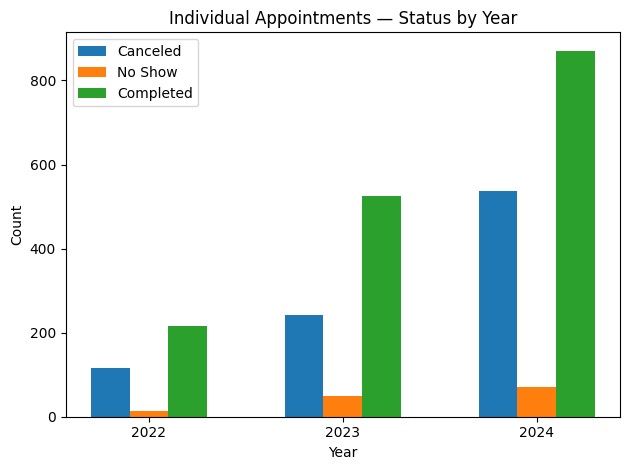

Saving plot to: /content/group_appointments_status_by_year.png


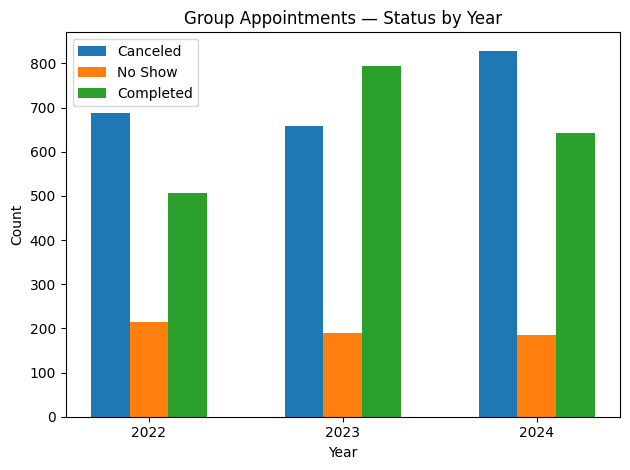

In [ ]:
# --------------------
# For individual and group appointments, show the bar plots for the number of complete, cancleled, and no show appointments for each year
# --------------------

import matplotlib.pyplot as plt
import numpy as np
import os

# 1) parameters
statuses = ['Canceled', 'No Show', 'Completed']
years    = [2022, 2023, 2024]
width    = 0.2
x        = np.arange(len(years))

# 2) loop over the two categories
for category in ['individual appointments', 'group appointments']:
    # filter & re‐index by Year
    sub = (
        summary[summary['Appointment Category'] == category]
          .set_index('Year')
          .reindex(years)[statuses]
    )

    # 3) plot
    fig, ax = plt.subplots()
    for i, status in enumerate(statuses):
        ax.bar(x + i*width, sub[status], width, label=status)

    ax.set_xticks(x + width)
    ax.set_xticklabels(years)
    ax.set_xlabel('Year')
    ax.set_ylabel('Count')
    ax.set_title(f"{category.title()} — Status by Year")
    ax.legend()
    plt.tight_layout()

    # --- save the figure ---
    # build a safe filename
    fname = f"{category.replace(' ', '_')}_status_by_year.png"
    # optional: show you where it went
    print("Saving plot to:", os.path.abspath(fname))
    fig.savefig(fname, dpi=300, bbox_inches='tight')

    plt.show()


In [ ]:
nrow,ncol = filled_df.shape
print("The number of rows in filled_df is: ",nrow)
print("The number of columns in filled_df is: ",ncol)

appt_type = filled_df['Appointment Type'].unique()
print(appt_type)

The number of rows in filled_df is:  8309
The number of columns in filled_df is:  22
['MYD-H SH1 VIDEO VISIT' 'MYD-H SH2 VIDEO VISIT'
 'PLACEHOLDER NO COMMUNICATION' 'PSY EVALUATION'
 'MYD-H VIDEO VISIT FOLLOW UP' 'MYD-H VIDEO VISIT NEW'
 'MYD-H GROUP VIDEO VISIT' 'MYD-H VIDEO VISIT NO CHARGE'
 'MYD-H VIDEO VISIT SCF' 'SPECIAL CLINIC NEW' 'TELEPHONE OFFICE VISIT'
 'PSY FOLLOW UP' 'MYD-H VIDEO VISIT NOW' 'PLACEHOLDER VIEW ONLY'
 'BILLING ONLY' 'NEW PATIENT' 'FOLLOW UP VISIT']


In [ ]:
def GI_flow(data,year):
  '''
  Create the patient flow for the GI_Health Project
  '''
  data = data[data['Appointment Date'].dt.year == year]
  # --------------------
  # Remove rows that the 'Appointment Type' values should be ignored
  # --------------------
  appt_type = set(data['Appointment Type'].unique())
  types_remove = {'PLACEHOLDER NO COMMUNICATION', 'MYD-H VIDEO VISIT SCF', 'SPECIAL CLINIC NEW', 'MYD-H VIDEO VISIT NO CHARGE',
                  'MYD-H VIDEO VISIT NOW', 'PLACEHOLDER VIEW ONLY', 'BILLING ONLY', 'NEW PATIENT', 'FOLLOW UP VISIT'}
  appt_newtype = appt_type - types_remove
  # Use boolean indexing with .isin() and negate with ~:
  data = data[~data['Appointment Type'].isin(types_remove)].reset_index(drop=True)


  flow_record_alltype = {}   # Record the flow for all types of appointments
  for tp in appt_newtype:
    df_current = data[data['Appointment Type'] == tp].reset_index(drop=True)
    # Under the current appointment type, for each pt, we record the total number of cancel, complete, and no show
    curr_pt = df_current.loc[0,'MRN']
    stage_num = 0   # Complete marks the end of the current stage
    flow_record = {stage_num: {'no show':0, 'cancel':0, 'complete':0}}   # Flow record for the current appointment type
    curr_noshow, curr_cancel, curr_complete = 0,0,0   # Initialize the number of no show, cancel, and comlete for the current patient
    for row in range(df_current.shape[0]):
      if df_current.loc[row,'MRN'] == curr_pt:
        appt_status = df_current.loc[row,'Appointment Status']
        if appt_status == 'No Show' and curr_noshow == 0:
          flow_record[stage_num]['no show'] += 1
        elif appt_status == 'Canceled' and curr_cancel == 0:
          flow_record[stage_num]['cancel'] += 1
        elif appt_status == 'Completed' and curr_complete == 0:
          flow_record[stage_num]['complete'] += 1
          stage_num += 1
          #print("The keys for flow record are: ",flow_record.keys())
          if stage_num not in flow_record.keys():
            flow_record[stage_num] = {'no show':0, 'cancel':0, 'complete':0}   # If the current stage number is not in flow_record, we create it

      else:
        stage_num = 0   # For the new patient, initialize the stage number as 0
        curr_pt = df_current.loc[row,'MRN']
        curr_noshow, curr_cancel, curr_complete = 0,0,0
        appt_status = df_current.loc[row,'Appointment Status']
        if appt_status == 'No Show':
          flow_record[stage_num]['no show'] += 1
        elif appt_status == 'Canceled':
          flow_record[stage_num]['cancel'] += 1
        elif appt_status == 'Completed':
          flow_record[stage_num]['complete'] += 1
          stage_num += 1
          if stage_num not in flow_record.keys():
            flow_record[stage_num] = {'no show':0, 'cancel':0, 'complete':0}   # If the current stage number is not in flow_record, we create it

    flow_record_alltype[tp] = flow_record # Add the flow of the current type to the aggregating flow dictionary
    clean_flow_alltype = {}
    for tp, stages in flow_record_alltype.items():
        # keep only stages where any of the three counts > 0
        cleaned_stages = {
            stage: counts
            for stage, counts in stages.items()
            if any(v > 0 for v in counts.values())
        }
        clean_flow_alltype[tp] = cleaned_stages

  return clean_flow_alltype


# Check the flow for all types of appointments
flow_alltypes = GI_flow(filled_df, 2022)
print(flow_alltypes)











{'MYD-H VIDEO VISIT NEW': {0: {'no show': 4, 'cancel': 26, 'complete': 37}, 1: {'no show': 0, 'cancel': 4, 'complete': 0}}, 'MYD-H VIDEO VISIT FOLLOW UP': {0: {'no show': 1, 'cancel': 19, 'complete': 50}, 1: {'no show': 4, 'cancel': 10, 'complete': 34}, 2: {'no show': 3, 'cancel': 9, 'complete': 28}, 3: {'no show': 0, 'cancel': 15, 'complete': 17}, 4: {'no show': 0, 'cancel': 6, 'complete': 13}, 5: {'no show': 0, 'cancel': 2, 'complete': 11}, 6: {'no show': 0, 'cancel': 1, 'complete': 5}, 7: {'no show': 1, 'cancel': 1, 'complete': 2}, 8: {'no show': 0, 'cancel': 1, 'complete': 0}}, 'MYD-H SH1 VIDEO VISIT': {0: {'no show': 8, 'cancel': 42, 'complete': 18}, 1: {'no show': 0, 'cancel': 3, 'complete': 2}}, 'PSY FOLLOW UP': {0: {'no show': 1, 'cancel': 2, 'complete': 6}, 1: {'no show': 0, 'cancel': 3, 'complete': 2}, 2: {'no show': 0, 'cancel': 2, 'complete': 2}, 3: {'no show': 0, 'cancel': 2, 'complete': 1}, 4: {'no show': 0, 'cancel': 7, 'complete': 0}}, 'TELEPHONE OFFICE VISIT': {0: {'no

In [ ]:
# --------------------
# Type the output above in different lines to show flow for each appointment type
# --------------------
import matplotlib.pyplot as plt
import os

# Optional: Create a directory to save the plots
output_dir = "appointment_type_plots"
os.makedirs(output_dir, exist_ok=True)

for tp in flow_alltypes.keys():
  print(f"The flow for appointment type {tp}: ",flow_alltypes[tp])
  #if tp == 'MYD-H SH1 VIDEO VISIT':
  # Prepare data
  flow = flow_alltypes[tp]
  stages = sorted(flow.keys())
  apptments = [s+1 for s in stages]
  no_show = [flow[s]['no show'] for s in stages]
  cancel = [flow[s]['cancel'] for s in stages]
  complete = [flow[s]['complete'] for s in stages]

  # Plotting
  plt.figure()
  plt.plot(apptments, no_show, marker='o', label='No Show')
  plt.plot(apptments, cancel, marker='o', label='Cancel')
  plt.plot(apptments, complete, marker='o', label='Complete')
  plt.xlabel('Appointment')
  plt.ylabel('Count')
  plt.title(f'Flow for Appointment Type: {tp}')
  plt.xticks(apptments)
  plt.legend()

  # Sanitize filename and save
  safe_tp = tp.replace(" ", "_").replace("/", "_").replace(":", "_")
  filepath = os.path.join(output_dir, f"{safe_tp}.png")
  plt.savefig(filepath)
  plt.close()  # Close the plot to save memory

  plt.show()

The flow for appointment type MYD-H VIDEO VISIT NEW:  {0: {'no show': 4, 'cancel': 26, 'complete': 37}, 1: {'no show': 0, 'cancel': 4, 'complete': 0}}
The flow for appointment type MYD-H VIDEO VISIT FOLLOW UP:  {0: {'no show': 1, 'cancel': 19, 'complete': 50}, 1: {'no show': 4, 'cancel': 10, 'complete': 34}, 2: {'no show': 3, 'cancel': 9, 'complete': 28}, 3: {'no show': 0, 'cancel': 15, 'complete': 17}, 4: {'no show': 0, 'cancel': 6, 'complete': 13}, 5: {'no show': 0, 'cancel': 2, 'complete': 11}, 6: {'no show': 0, 'cancel': 1, 'complete': 5}, 7: {'no show': 1, 'cancel': 1, 'complete': 2}, 8: {'no show': 0, 'cancel': 1, 'complete': 0}}
The flow for appointment type MYD-H SH1 VIDEO VISIT:  {0: {'no show': 8, 'cancel': 42, 'complete': 18}, 1: {'no show': 0, 'cancel': 3, 'complete': 2}}
The flow for appointment type PSY FOLLOW UP:  {0: {'no show': 1, 'cancel': 2, 'complete': 6}, 1: {'no show': 0, 'cancel': 3, 'complete': 2}, 2: {'no show': 0, 'cancel': 2, 'complete': 2}, 3: {'no show': 0,

In [ ]:
# --------------------
# Download the appointment plots for all appointment types
# --------------------
import shutil
from google.colab import files

shutil.make_archive('appointment_type_plots', 'zip', 'appointment_type_plots')
files.download('appointment_type_plots.zip')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Revenue and cost calculation**
(1) Ignored: bottom 5 vivist types, special clinic new, visit SCF, no charge, placeholder no communication \\
(2) SH1 (group visit, 60min): first session, SH2 (60min): 2,3, and 4th session \\
(3) First individual visit: 60min, indivisdual following viists: 30, 45, or 60min (assume they follow proprotion of total visits) \\
(4) Revenue and cost : cauculate on a yearly basis (so Jessica can see if its in the right direction) \\





The total revenue in 2022 is: 33803.37545728643
The total revenue in 2022 is: 33803.37545728643
The total revenue in 2022 is: 33803.37545728643
The total revenue in 2023 is: 72738.55177788944
The total revenue in 2023 is: 72738.55177788944
The total revenue in 2023 is: 72738.55177788944
The total revenue in 2024 is: 93910.57364422109
The total revenue in 2024 is: 93910.57364422109
The total revenue in 2024 is: 93910.57364422109


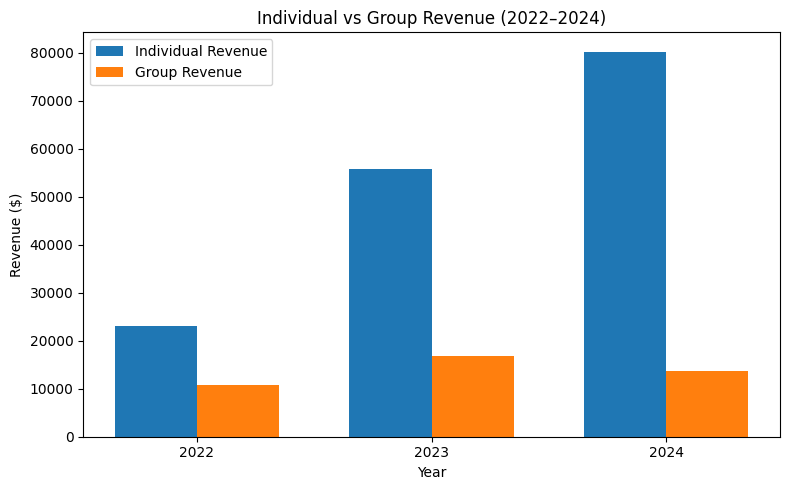

In [ ]:
# --------------------
# The function to calculate yearly revenue
# Assumption: Only complete appointments can generate revenue
# indi_ratio: Within individual appointments, the ratio of 60-min, 45-min, and 30-min appointments. The result is obtained from the function
# 'def ratio_calculator(df)' in GI Behavior Health.
# --------------------

def revenue(data, year, rvu, rate, indi_ratio):
  group_rvu = rvu[0]
  indivi_rvu = rvu[1]
  group_types = {'MYD-H SH1 VIDEO VISIT', 'MYD-H SH2 VIDEO VISIT', 'MYD-H GROUP VIDEO VISIT'}
  flow_alltypes = GI_flow(data, year)
  group_appts = 0
  indivi_appts = 0

  for types in flow_alltypes.keys():
    if types in group_types:
      group_appts += sum(appt_info['complete'] for appt_info in flow_alltypes[types].values())
    else:
      indivi_appts += sum(appt_info['complete'] for appt_info in flow_alltypes[types].values())

  group_revenue = group_appts * group_rvu * rate
  indivi_revenue = (indivi_appts * indi_ratio[0]*indivi_rvu[0] + indivi_appts * indi_ratio[1]*indivi_rvu[1]
                   + indivi_appts * indi_ratio[2]*indivi_rvu[2])*rate
  total_revenue = group_revenue + indivi_revenue
  # total_revenue = (group_appts * group_rvu + indivi_appts * indi_ratio[0]*indivi_rvu[0] + indivi_appts * indi_ratio[1]*indivi_rvu[1]
  #                  + indivi_appts * indi_ratio[2]*indivi_rvu[2])*rate   # Need update
  print(f"The total revenue in {year} is: {total_revenue}")

  return total_revenue, group_revenue, indivi_revenue

# Generate total revenue, group revenue, and individual revenue from 2022 to 2024
group_revenue = []
indivi_revenue = []
for year in [2022,2023,2024]:
  data, rvu, rate, indi_ratio = filled_df, [0.65,[3.84,2.45,1.86]], 32.74, [0.6834170854271356, 0.10050251256281408, 0.21608040201005024]
  total_revenue = revenue(data, year, rvu, rate, indi_ratio)[0]
  group_revenue.append(revenue(data, year, rvu, rate, indi_ratio)[1])
  indivi_revenue.append(revenue(data, year, rvu, rate, indi_ratio)[2])

# Plot the group and individual revenue from 2022 to 2024
years = ['2022', '2023', '2024']
x = np.arange(len(years))  # the label locations
width = 0.35  # the width of the bars

# Create the plot
plt.figure(figsize=(8, 5))
plt.bar(x - width/2, indivi_revenue, width, label='Individual Revenue')
plt.bar(x + width/2, group_revenue, width, label='Group Revenue')

# Labels and formatting
plt.xlabel('Year')
plt.ylabel('Revenue ($)')
plt.title('Individual vs Group Revenue (2022–2024)')
plt.xticks(x, years)
plt.legend()
plt.tight_layout()
#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()





{2022: [24000.0, 7200.0, 0], 2023: [22240.0, 29700.0, 2400.0], 2024: [86480.0, 31200.0, 2880.0]}
The total cost in 2022 is: 31200.0
The total cost in 2023 is: 54340.0
The total cost in 2024 is: 120560.0


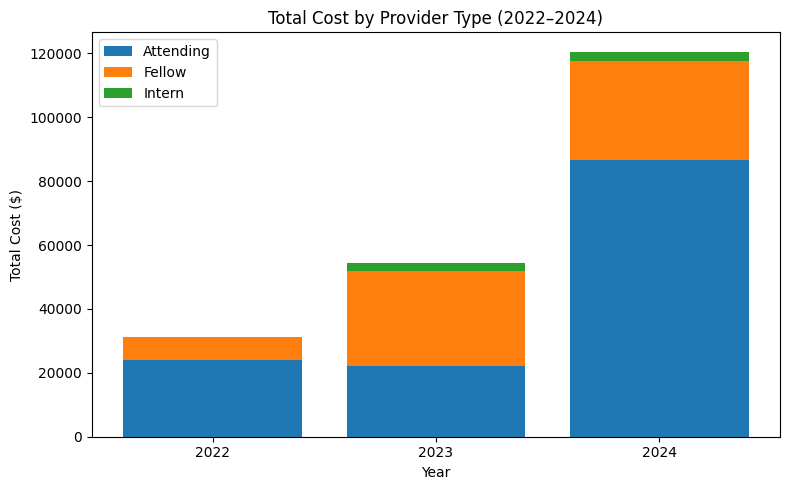

In [ ]:
# --------------------
# The function to calculate yearly cost
# Assumptions:
# (1) Monthly full time salary of attending is $8,000, full time fellow is $6,000, and full time intern is $2,400.
# (2) If a provider works part time (say 40%), then the monthly salary is: full time salary * ratio of commitment = full time salary * 40%
# --------------------

cost_byyear = {}
# 2022 total attending, fellow, and intern hours
total_attend_cost_2022 = 12*8000*0.25
total_fellow_cost_2022 = 3*6000*0.4
total_intern_cost_2022 = 0
cost_byyear[2022] = [total_attend_cost_2022, total_fellow_cost_2022, total_intern_cost_2022]

# 2023 total attending, fellow, and intern hours
total_attend_cost_2023 = (1*8000*0.25 + 1*8000*0.15 + 4*8000*0.05 + 6*8000*0.03) + (2*8000*1)
total_fellow_cost_2023 = (8*6000*0.4 + 1*6000*0.55) + (3*6000*0.4)
total_intern_cost_2023 = (5*2400*0.2)
cost_byyear[2023] = [total_attend_cost_2023, total_fellow_cost_2023, total_intern_cost_2023]

# 2024 total attending, fellow, and intern hours
total_attend_cost_2024 = (6*8000*0.03 + 6*8000*0.11) + (3*8000*1 + 1*8000*0.64 + 2*8000*1 + 2*8000*0.73 + 1*8000*0.83 + 3*8000*0.68)
total_fellow_cost_2024 = (9*6000*0.4) + (4*6000*0.4)
total_intern_cost_2024 = (6*2400*0.2)
cost_byyear[2024] = [total_attend_cost_2024, total_fellow_cost_2024, total_intern_cost_2024]

print(cost_byyear)
for year in cost_byyear.keys():
  total_cost = sum(cost_byyear[year])
  print(f"The total cost in {year} is: {total_cost}")

# Plot the cost of attending, fellow, and intern for each year
years = [2022, 2023, 2024]
x = np.arange(len(years))
attending = [cost_byyear[y][0] for y in years]
fellow = [cost_byyear[y][1] for y in years]
intern = [cost_byyear[y][2] for y in years]

plt.figure(figsize=(8, 5))
plt.bar(x, attending, label='Attending')
plt.bar(x, fellow, bottom=attending, label='Fellow')
plt.bar(x, intern, bottom=np.array(attending) + np.array(fellow), label='Intern')

plt.xlabel('Year')
plt.ylabel('Total Cost ($)')
plt.title('Total Cost by Provider Type (2022–2024)')
plt.xticks(x, [str(y) for y in years])
plt.legend()
plt.tight_layout()
plt.show()













In [ ]:
import pandas as pd

# Construct the data
def summary_generator(year, revenue, cost):
  data = {
    "Year": year,
    "Revenue": revenue,
    "Cost": cost
}
  # Create DataFrame
  df_summary = pd.DataFrame(data)
  df_summary['Profit'] = df_summary['Revenue'] - df_summary['Cost']
  return df_summary

df_summary = summary_generator([2022, 2023, 2024], [33803.37545728643, 72738.55177788944, 93910.5736442211], [31200.0, 54340.0, 120560.0])
print("The sumamry table is: ")
print(df_summary)


The sumamry table is: 
   Year       Revenue      Cost        Profit
0  2022  33803.375457   31200.0   2603.375457
1  2023  72738.551778   54340.0  18398.551778
2  2024  93910.573644  120560.0 -26649.426356


In [ ]:
# group rvu: 0.65
# individual 1h rvu: 3.84
# individual 45min rvu: 2.45
# individual 30min rvu: 1.86

In [ ]:
!git clone https://github.com/VincctsentChen/Patient_Flow_Analysis.git

Cloning into 'Patient_Flow_Analysis'...


In [ ]:
# 0) Go to the folder that contains your files
%cd '/content/drive/My Drive/GI_Behavior_Health/'

# Initialize a repo
!git init

# (Optional) set default branch name
!git branch -M main


# Configure your Git identity
!git config --global user.email "zequn.chen.th@dartmouth.edu"
!git config --global user.name "VincctsentChen"

# Add your remote repo (HTTPS method)
!git remote add origin https://github.com/VincctsentChen/Patient_Flow_Analysis.git

# Stage and commit changes
!git add .
!git commit -m "Calculate the total appointments and visit from 2022 to 2024 for individual and group visits, respectively."

# Push changes (will ask for username/token)
!git push origin main


/content/drive/My Drive/GI_Behavior_Health
hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/drive/My Drive/GI_Behavior_Health/.git/
[main (root-commit) 2c051ba] Calculate the total appointments and visit from 2022 to 2024 for individual and group visits, respectively.
 9 files changed, 2 insertions(+)
 create mode 100644 Data/Appointment Count.png
 create mode 100644 Data/BH Data CPT Code Retrieval.xlsx
 create mode 100644 Data/Code Frequency.xlsx
 create mode 100644 Data/Fill rate report_Shari_Mcbride_WebI_Fill_R

In [ ]:
!ssh-keygen -t ed25519 -C "zequn.chen.th@dartmouth.edu" -f ~/.ssh/id_ed25519 -N ""


Generating public/private ed25519 key pair.
Created directory '/root/.ssh'.
Your identification has been saved in /root/.ssh/id_ed25519
Your public key has been saved in /root/.ssh/id_ed25519.pub
The key fingerprint is:
SHA256:ERVI3KiZvGXlqltmcRhh8Sf6a6GW+AngkJ1u7WRQYuM zequn.chen.th@dartmouth.edu
The key's randomart image is:
+--[ED25519 256]--+
|       o**o.     |
|       .++o      |
|    +..+ooo .    |
|   = == o=.o     |
|  o E  +S..      |
|   + +. .+.      |
|    + =o+o..     |
|   . +o=+...     |
|      o+o..      |
+----[SHA256]-----+


In [ ]:
!cat ~/.ssh/id_ed25519.pub


ssh-ed25519 AAAAC3NzaC1lZDI1NTE5AAAAIMani3nvzIZ/SMqapFB2xuDMh7w5iskIpdML8UpbN/W6 zequn.chen.th@dartmouth.edu


In [ ]:
# Start the ssh-agent
!eval "$(ssh-agent -s)"
# Add your private key
!ssh-add ~/.ssh/id_ed25519

# Add GitHub to known hosts
!mkdir -p ~/.ssh
!ssh-keyscan github.com >> ~/.ssh/known_hosts

Agent pid 11980
Could not open a connection to your authentication agent.
# github.com:22 SSH-2.0-5ec3cafd
# github.com:22 SSH-2.0-5ec3cafd
# github.com:22 SSH-2.0-5ec3cafd
# github.com:22 SSH-2.0-5ec3cafd
# github.com:22 SSH-2.0-5ec3cafd


In [ ]:
%cd "/content/drive/My Drive/GI_Behavior_Health"
!git remote remove origin 2>/dev/null || true
!git remote add origin git@github.com:VincctsentChen/Patient_Flow_Analysis.git


/content/drive/My Drive/GI_Behavior_Health


In [ ]:
!git push -u origin main


Enumerating objects: 12, done.
Counting objects: 100% (12/12), done.
Delta compression using up to 2 threads
Compressing objects: 100% (12/12), done.
Writing objects: 100% (12/12), 1.71 MiB | 8.92 MiB/s, done.
Total 12 (delta 0), reused 0 (delta 0), pack-reused 0
To github.com:VincctsentChen/Patient_Flow_Analysis.git
 * [new branch]      main -> main
Branch 'main' set up to track remote branch 'main' from 'origin'.
